### Prologue

* **Python for Portfolio Optimization: The Ascent!**

First working lessons to ascend the hilly terrain of Portfolio Optimization in seven strides (Lessons), beginning with the fundamentals (Lesson 1) and climbing slope after slope (Lessons 2-6), to reach the first peak of constrained portfolio optimization models (Lesson 7), amongst a range of peaks waiting beyond!

* **Lesson 1 Fundamentals of Risk and Return of a Portfolio**    

* **Lesson 2 Some Glimpses of Financial Data Wrangling**   

* **Lesson 3 Heuristic Portfolio Selection**


## Lesson 4


#  Traditional Methods for Portfolio Construction

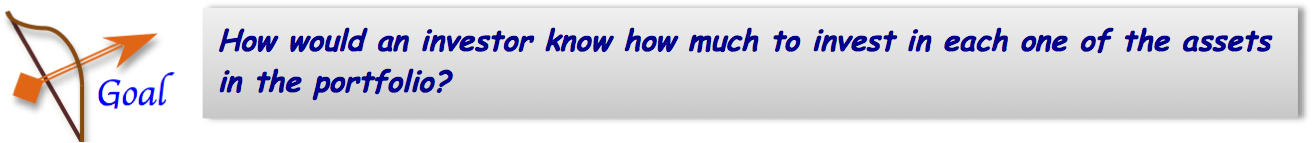

In [1]:
from IPython.display import Image
Image("/kaggle/input/traditional-methods-for-portfolio-construction/Lesson4GoalHeaderImage.png")

## 4.1 Introduction

An investor essentially has to do a lot of study and research before the assets comprising the portfolio are selected. **Lesson 3 Heuristic Portfolio Selection** detailed on how $k$-means clustering could be employed to undertake a heuristic selection of assets that ensures diversification. Termed **$k$-portfolios**, these portfolios ensured diversification by virtue of the choices made, one each from each cluster generated by the clustering method, which are inherently dissimilar in behaviour. Nevertheless, several questions need to be answered with regard to the behaviour of $k$-portfolios. 

The first and foremost question is *what is the diversification index of a $k$-portfolio*? In other words, having decided to invest in a $k$-portfolio, how would an investor know how diversified is the portfolio?   
  
In this regard,  one among several diversification indices available in the finance literature, viz., **Diversification Ratio** was introduced in Lesson 3. However, to compute the diversification index,  the investor should have decided on the apportionment of capital over each of the assets in the portfolio. In other words, the asset allocation **weights** (introduced in **Lesson 1 Fundamentals of Risk and Return of a Portfolio**) must have been determined. 

Needless to say, determining the asset allocation weights is an equally, if not more, complex task especially when investors are strongly inclined to follow some popular investment strategies or express preference for certain assets or asset classes in the portfolio or are bound by company norms or religious laws etc. We shall defer discussion on these complex asset allocation models and for now, focus on traditional and time tested methods of determining asset allocation weights. 

Two traditional methods of asset allocation, which are considered as benchmark portfolio construction strategies are introduced in this lesson. They are,  

(1) **Equal weighted portfolio construction**, and   
(2) **Inverse volatility weighted portfolio construction**.  

The two techniques shall be applied over $k$-portfolios to determine their Diversification Ratios and study their behaviour. 

## 4.2 Equal Weighted Portfolio Construction

An **equal weighted portfolio construction** treats all stocks in the portfolio as equal and allots equal weights. Thus the weight vector of a portfolio comprising $N$ stocks is given by   
 

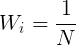

In [2]:
from IPython.display import Image
Image("/kaggle/input/traditional-methods-for-portfolio-construction/Lesson4Eqn4_1.png")


<h5 align="right">..............................(4.1)</h5>

The following Python code applies equal weighted portfolio construction method for the DJIA $k$-portfolio (**$k$-portfolio 1**) discussed in Sec. 3.5 of **Lesson 3 Heuristic Portfolio Selection**.  The $k$-portfolio comprises the following stocks:  

𝑘-portfolio 1:

{Coca-Cola (KO), United Health (UNH), Walt Disney (DIS), IBM (IBM), Cisco (CSCO), JPMorgan Chase (JPM), Goldman Sachs (GS), Walgreens Boots Alliance (WBA), Apple (AAPL), Home Depot (HD), American Express (AXP), McDonald's (MCD), Merck (MRK), Boeing (BA), Caterpillar (CAT)}   

In [3]:
#read k portfolio 1 dataset comprising 15 stocks

#dependencies
import numpy as np
import pandas as pd

#input stock dataset
StockFileName = '/kaggle/input/traditional-methods-for-portfolio-construction/DJIA_Apr112014_Apr112019_kpf1.csv'
Rows = 1259  #excluding header
Columns = 15  #excluding date

#read stock prices 
df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print('k-portfolio 1 asset labels:\n', assetLabels)

#extract stock prices excluding header and trading dates
dfStockPrices = df.iloc[1:, 1:]

#store stock prices as an array
arStockPrices = np.asarray(dfStockPrices)
[rows, cols]= arStockPrices.shape
print('k-portfolio 1 dataset size:\n', rows, cols)
print('k-portfolio 1 stock prices:\n', arStockPrices)

k-portfolio 1 asset labels:
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']
k-portfolio 1 dataset size:
 1258 15
k-portfolio 1 stock prices:
 [[ 74.525711  85.5      123.25     ...  55.57      79.18      65.669998]
 [ 73.994286  86.040001 124.269997 ...  56.049999  79.510002  66.010002]
 [ 74.144287  87.400002 126.040001 ...  56.259998  78.190002  66.160004]
 ...
 [199.5      109.849998 369.040009 ...  80.800003 248.789993  54.5     ]
 [200.619995 110.160004 364.940002 ...  80.82     246.029999  54.509998]
 [198.949997 109.849998 370.160004 ...  79.839996 235.419998  53.439999]]


The $k$-portfolio returns are computed as discussed in **Lesson 1 Fundamentals of risk and return of a portfolio**. The Python function to compute daily returns and the code fragment that runs it over DJIA $k$-portfolio 1 are shown below.

In [4]:
#function to compute stock returns
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):  # j: Assets
        for i in range(Rows-1):     #i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])

    return StockReturn

In [5]:
#compute asset returns
arReturns = StockReturnsComputing(arStockPrices, rows, cols)
print('k-portfolio 1 returns:\n', arReturns)

k-portfolio 1 returns:
 [[-0.00713076  0.0063158   0.00827584 ...  0.00863774  0.00416774
   0.00517746]
 [ 0.0020272   0.01580661  0.01424321 ...  0.00374664 -0.01660168
   0.00227241]
 [ 0.01142563 -0.01350116  0.01491588 ...  0.00373272 -0.03082239
   0.00891771]
 ...
 [-0.00299853 -0.0076784  -0.01463201 ... -0.00185292  0.00016078
  -0.01017074]
 [ 0.00561401  0.00282208 -0.01110993 ...  0.00024749 -0.01109367
   0.00018345]
 [-0.00832419 -0.00281414  0.01430373 ... -0.01212576 -0.04312483
  -0.01962941]]


The mean returns and the variance-covariance matrix of returns are computed as demonstrated in the Python code shown below.

In [6]:
#compute mean returns and variance covariance matrix of returns

#set precision for printing results
np.set_printoptions(precision=5, suppress = True)

meanReturns = np.mean(arReturns, axis = 0)
print('Mean returns of k-portfolio 1:\n', meanReturns)
covReturns = np.cov(arReturns, rowvar=False)
print('\nVariance-Covariance matrix of returns of k-portfolio 1: \n')
print('Size  ', covReturns.shape, '\n', covReturns)

Mean returns of k-portfolio 1:
 [ 0.0009   0.00028  0.00099  0.00038  0.0008   0.00039  0.00032  0.00085
 -0.00017  0.00061  0.00019  0.00056  0.00036  0.00095 -0.00003]

Variance-Covariance matrix of returns of k-portfolio 1: 

Size   (15, 15) 
 [[0.00024 0.00007 0.0001  0.0001  0.0001  0.00007 0.0001  0.00007 0.00007
  0.00008 0.00003 0.00005 0.00005 0.00008 0.00007]
 [0.00007 0.00016 0.00008 0.00009 0.00007 0.00006 0.00011 0.00007 0.00007
  0.0001  0.00003 0.00003 0.00006 0.00007 0.00007]
 [0.0001  0.00008 0.00023 0.00013 0.00009 0.00007 0.00011 0.00007 0.00008
  0.0001  0.00004 0.00005 0.00006 0.00007 0.00007]
 [0.0001  0.00009 0.00013 0.00027 0.0001  0.00007 0.00013 0.00008 0.00009
  0.00012 0.00004 0.00005 0.00006 0.00007 0.00007]
 [0.0001  0.00007 0.00009 0.0001  0.00018 0.00007 0.00009 0.00007 0.00008
  0.00009 0.00004 0.00005 0.00006 0.00007 0.00007]
 [0.00007 0.00006 0.00007 0.00007 0.00007 0.00014 0.00008 0.00006 0.00006
  0.00007 0.00003 0.00004 0.00005 0.00006 0.00006]
 [0

Applying equal weighted portfolio construction method to $k$-portfolio 1 and obtaining the annualized risk (%) and the expected annual return (%) of the portfolio (as discussed in **Lesson 1 Fundamentals of risk and return of a portfolio**) yields the following.

In [7]:
#equal weighted portfolio construction: Annualized risk and 
#expected annualized portfolio return
#trading days = 251
PortfolioSize = Columns
EqualWeightVector = np.ones((1,PortfolioSize))*(1.0/PortfolioSize)
EqWgtPortfolioRisk = np.sqrt(np.matmul((np.matmul(EqualWeightVector,covReturns)), \
                     np.transpose(EqualWeightVector)))
EqWgtAnnPortfolioRisk = EqWgtPortfolioRisk*np.sqrt(251)*100
EqWgtPortfolioReturn = np.matmul(EqualWeightVector, np.transpose(meanReturns))
EqWgtAnnPortfolioReturn = 251*EqWgtPortfolioReturn * 100

print("Annualized Portfolio Risk :  %4.2f" % EqWgtAnnPortfolioRisk, "%")
print("\nAnnualized Expected Portfolio Return:  %4.2f" %  EqWgtAnnPortfolioReturn,"%")


Annualized Portfolio Risk :  13.68 %

Annualized Expected Portfolio Return:  12.34 %


### Diversification Ratio of the Equal Weighted $k$-Portfolio

Following equation (3.1) in **Lesson 3 Heuristic Portfolio Selection**, the Diversification Ratio of  $k$-portfolio 1 is computed as follows. 

In [8]:
# Equal weighted portfolio: Diversification Ratio
EqWgtPortfolioAssetStdDev = np.sqrt(np.diagonal(covReturns))
EqWgtPortfolioDivRatio = np.sum(np.multiply(EqWgtPortfolioAssetStdDev, EqualWeightVector)) \
                         / EqWgtPortfolioRisk
print("\n Equal Weighted Portfolio:Diversification Ratio  %4.2f" % EqWgtPortfolioDivRatio)



 Equal Weighted Portfolio:Diversification Ratio  1.53


## 4.3 Inverse Volatility Weighted Portfolio

An **inverse volatility weighted portfolio**  is one in which highly volatile assets are allotted smaller weights and low volatile assets are allotted larger weights. Thus, the weights of the individual assets in the portfolio are proportional to the reciprocals of their individual volatilities.   
The weights are given by,  


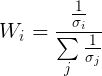

In [9]:
from IPython.display import Image
Image("/kaggle/input/traditional-methods-for-portfolio-construction/Lesson4Eqn4_2.png")



<h5 align="right">..............................(4.2)</h5>

The following Python code applies inverse volatility weighted portfolio construction method for the DJIA $k$-portfolio (**$k$-portfolio 1**) discussed in Sec. 4.2.   

Since the diagonal of the variance-covariance matrix of returns **covReturns** denotes the variance of returns, the individual asset risk $\sigma_i$ of asset $i$ in the $k$-portfolio, which is defined to be the standard deviation of asset returns, can be computed as square root of the variance. **InvVolWeightAssets_Risk** in the Python code shown below does just that.   


The annualized risk (%) and the expected annual return (%) of the inverse volatility weighted $k$-portfolio have been shown in the output.

In [10]:
#Inverse volatility weighted portfolio construction: Annualized risk and 
#Expected annualized portfolio return
#Trading days = 251
InvVolWeightAssets_Risk = np.sqrt(np.diagonal(covReturns))
InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                             InvVolWeightAssets_ReciprocalRisk_Sum
InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                             covReturns)), np.transpose(InvVolWeightAssets_Weights)))

#annualized risk and return
InvVolWeightPortfolio_AnnRisk = np.sqrt(251)* InvVolWeightPortfolio_Risk *100
InvVolWeightPortfolio_AnnReturn = 251* np.matmul(InvVolWeightAssets_Weights,\
                                  np.transpose(meanReturns)) *100

print("Annualized Portfolio Risk: %4.2f" % InvVolWeightPortfolio_AnnRisk,"%\n")
print("Annualized Expected Portfolio Return: %4.2f" % InvVolWeightPortfolio_AnnReturn,"%")


Annualized Portfolio Risk: 13.24 %

Annualized Expected Portfolio Return: 12.13 %


The Diversification Ratio of the Inverse Volatility Weighted Portfolio is shown in the output. 

In [11]:
# Inverse volatility weighted portfolio: Diversification Ratio
InvVolWeightAssets_Risk= np.sqrt(np.diagonal(covReturns))
InvVolWeightPortfolioDivRatio = \
np.sum(np.multiply(InvVolWeightAssets_Risk, InvVolWeightAssets_Weights))\
/ InvVolWeightPortfolio_Risk
print("\n Inverse Volatility  Weighted Portfolio:Diversification Ratio %4.2f" \
      % InvVolWeightPortfolioDivRatio)



 Inverse Volatility  Weighted Portfolio:Diversification Ratio 1.54


## 4.4  "Ideal" Equal Weighted and Inverse Volatility Weighted Portfolios

The  investor chose to invest in a $k$-portfolio of 15 stocks selected out of the "mini-universe" of 29 DJIA stocks. The equal weighted portfolio construction yielded a Diversification Ratio of 1.53 and the inverse volatility weighted portfolio construction yielded a Diversification Ratio of 1.54. The annualized risk and expected portfolio return of the equal weighted and inverse volatility weighted portfolios were (13.68%, 12.34%) and (13.24%, 12.13%) respectively.  
Now, was investing on the $k$-portfolio worth the effort? What if the investor had chosen to invest in the whole "mini-universe", which needless to say is an "ideal" portfolio? Would the behaviour of the "ideal" portfolio surpass that of the contending portfolios?  

Repeating the portfolio construction methods over the "mini-universe" and running the Python code all over again with the CSV file whose details have been provided in the Python code shown below, yields an output,  snapshots of which are shown in the succeeding cells.

In [12]:
#identify the "mini" stock universe dataset
StockFileName = '/kaggle/input/traditional-methods-for-portfolio-construction/DJIA_Apr112014_Apr112019.csv'
Rows = 1259  #excluding header
Columns = 29  #excluding date

The "ideal" equal weighted porfolio yields the following results:

**"Ideal" Equal Weighted Portfolio**  

Annualized portfolio risk:             12.84%   
Expected Annualized portfolio return:  11.75%  
Diversification Ratio:                  1.57

The "ideal" inverse volatility weighted portfolio yields the following results:

**"Ideal" Inverse Volatility  Weighted Portfolio** 

Annualized portfolio risk:            12.47%  
Expected Annualized portfolio return: 11.29%  
Diversification Ratio:                 1.57


A comparison of the "ideal" portfolio behaviour with that of the $k$-portfolio's behaviour yields the following observations:    

(1)  Even if an investor had enough capital to invest in all the stocks in the "mini-universe", despite employing time-tested portfolio construction methods such as equal weighted or inverse volatility weighted construction, the behaviour of the "ideal" portfolio does not surpass that of its contenders and hence is not a remarkable choice to opt for.  

(2)  The Diversification Ratios of both equal weighted and inverse volatility weighted $k$-portfolios are in  proximity to that of the "ideal" portfolio, conveying a significant message that prudent selection of stocks ($k$-means clustering in this case) can ensure a diversification index as much as that of an "ideal"  portfolio  that invests in the complete universe of stocks.  

(3)  Diversification does not mean investing in a large number of stocks, but making a prudent choice of stocks, smaller in number yet diverse from one another in behaviour. A $k$-portfolio guarantees diversification in this sense.   

(4)  A portfolio that holds a large number of stocks, for the sake of diversification,  can give rise to huge transaction costs and management fees. $k$-portfolios in this regard are economical with regard to these costs.  

(5) $k$-portfolios by and large assure **risk-parity investing**, where higher returns are ensured for an equal amount of risk and diversification ratio, as that of an "ideal" portfolio.


### Companion Reading  



This blog  is an abridged adaptation of concepts discussed in Chapter 3 of [PAI 18] to Dow Jones dataset (DJIA index: April, 2014- April, 2019) and implemented in Python. Readers (read "worker bees"),  seeking more information may refer to the corresponding chapter in the  book.


<h3 align="left">References</h3>

[PAI 18]   Vijayalakshmi Pai G. A., Metaheuristics for Portfolio Optimization- *An 
           Introduction using MATLAB*, Wiley-ISTE, 2018. https://www.mathworks.com/academia/books/metaheuristics-for-portfolio-optimization-pai.html   
           
**GitHub Repository**    

PythonFinance-PortfolioOptimization https://github.com/PaiViji

## Next....

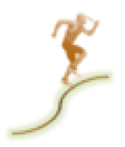

In [13]:
from IPython.display import Image
Image ("/kaggle/input/traditional-methods-for-portfolio-construction/Lesson4ExitTailImage.png")

**Lesson 5: Mean-Variance Optimization of Portfolios**   

(Goal: How would one determine the optimal weights which will ensure maximum  return and minimum risk for the portfolio that one is invested in?)  

Kaggle Kernel: Mean-Variance Optimization of Portfolios